## Run DEseq2

In [1]:
ENV["Code"] = "../../Code"
[push!(LOAD_PATH, string(ENV["Code"],"/", ii)) for ii in readdir(ENV["Code"])]

using PyCall
@pyimport matplotlib_venn

using DataFrames
using Seaborn
using NoLongerProblems_Pandas
using NoLongerProblems
using CSV
using RCall
import Pandas
using PrettyPlotting
using NoLongerProblems_Pandas
using SergiData
using HypothesisTests


rad21wt = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "WTUT", sample2 = "FLUT")
rad21wt_2 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "WT2", sample2 = "FL2") 
rad21wt_8 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "WT8", sample2 = "FL8") 
wt_2 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "WTUT", sample2 = "WT2")
wt_28 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "WT8", sample2 = "WT2")

wt_8 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "WTUT", sample2 = "WT8")
rad21_2 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "FLUT", sample2 = "FL2") 
rad21_28 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "FL8", sample2 = "FL2") 

rad21_8 = SergiData.SpikeNormalisationDeseq_YiFang(sample1 = "FLUT", sample2 = "FL8") 

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/irene/.julia/packages/PyPlot/XHEG0/src/init.jl:118
sys:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'MacOSX' by the following code:
  File "/Users/irene/anaconda3/lib/python2.7/site-packages/matplotlib_venn/__init__.py", line 55, in <module>
    from matplotlib_venn._venn2 import venn2, venn2_circles
  File "/Users/irene/anaconda3/lib/python2.7/site-packages/matplotlib_venn/_venn2.py", line 22, in <module>
    from matplotlib.pyplot import gca
  File "/Users/irene/anaconda3/lib/python2.7/site-packages/matplotlib/pyplot.py", line 71, in <module>
    from matplotlib.backends import pylab_setup
  File "/Users/irene/anaconda3/lib/python2.7/site-packages/matplotlib/backends/__init__.py", line 16,

,EnsemblID,baseMean,log2FoldChange,lfcSE,stat,pvalue
,String31,Float64,Float64,Float64,Float64,Float64
1,ENSMUSG00000074148,5008.55,7.09685,0.218833,32.4305,1.021e-230
2,ENSMUSG00000035042,35650.8,7.91189,0.267176,29.613,1.01623e-192
3,ENSMUSG00000022126,2.89987e5,8.66169,0.314005,27.5845,1.70634e-167
4,ENSMUSG00000089929,1772.09,6.17721,0.225083,27.4441,8.16766e-166
5,ENSMUSG00000074147,1599.09,9.45595,0.35906,26.3353,7.56196e-153
6,ENSMUSG00000017652,41838.6,4.77085,0.184423,25.8691,1.48556e-147
7,ENSMUSG00000026031,57151.5,2.75477,0.111597,24.685,1.55167e-134
8,ENSMUSG00000026822,13700.7,9.43914,0.393959,23.9597,7.32578e-127
9,ENSMUSG00000054203,22209.4,7.17796,0.302835,23.7026,3.3923e-124


##### GO analysis intersection

In [2]:
include("5_GO.jl")


function doGOTests()

universe[!, :Test] = universe[!, :padj].<0.05

perform_goseq(
        universe;
    analysisname = string(labels..., "_DE"),
        genome = "mm9", 
        geneid = "ensGene", 
        plot_fit = false, 
        test_cats = ["GO:BP"])


universe[!, :Test] = (universe[!, :padj].<0.05) .* (universe[!, :log2FoldChange].> 0)

perform_goseq(
        universe;
    analysisname = string(labels..., "_up"),
        genome = "mm9", 
        geneid = "ensGene", 
        plot_fit = false, 
        test_cats = ["GO:BP"])

universe[!, :Test] = (universe[!, :padj].<0.05 ).* (universe[!, :log2FoldChange].< 0)

perform_goseq(
        universe;
    analysisname = string(labels..., "_down"),
        genome = "mm9", 
        geneid = "ensGene", 
        plot_fit = false, 
        test_cats = ["GO:BP"])
    
end


labels = ["Rad21KO_UT__vs__WT_UT"]
universe = rad21wt
doGOTests()

labels = ["Rad21KO_2__vs__WT_2"]
universe = rad21wt_2
doGOTests()

labels = ["Rad21KO_8__vs__WT_8"]
universe = rad21wt_8
doGOTests()

labels = ["WT_2__vs__WT_UT"]
universe = wt_2
doGOTests()


labels = ["WT_8__vs__WT_2"]
universe = wt_28
doGOTests()


labels = ["WT_8__vs__WT_UT"]
universe = wt_8
doGOTests()

labels = ["Rad21KO_2__vs__Rad21KO_UT"]
universe = rad21_2
doGOTests()

labels = ["Rad21KO_8__vs__Rad21KO_UT"]
universe = rad21_8
doGOTests()

labels = ["Rad21KO_8__vs__Rad21KO_2"]
universe = rad21_28
doGOTests()


┌ Warning: RCall.jl: Loading required package: BiasedUrn
│ Loading required package: geneLenDataBase
│ 
└ @ RCall /Users/irene/.julia/packages/RCall/eRsxl/src/io.jl:160


LoadError: REvalError: Loading mm9 length data...
Warning in pcls(G) :
  initial point very close to some inequality constraints
Fetching GO annotations...
Error in library(paste(orgstring, "db", sep = "."), character.only = TRUE) : 
  there is no package called ‘org.Mm.eg.db’
Calls: perform_goseq -> goseq -> getgo -> library

In [3]:


tbs = readdir()
tbs = tbs[[endswith(ii, "goseq.csv") for ii in tbs]]

over_represented_pvalue = []
under_represented_pvalue = []
pvalue = []
ENV["COLUMNS"] = 10000
for ii in tbs
    df = CSV.read(ii, DataFrames.DataFrame)
    df[!,:Test] = [split(ii, "__go")[1] for a in 1:nrow(df)]
    CSV.write(ii, df)
end

maxitb = CSV.read(tbs, DataFrames.DataFrame)




function plot_category(goterm)
    minitb = maxitb[maxitb[!,:category].==goterm, :]
    title_= minitb[1,:term]
    file = sort(minitb, :Test)
    n = 24
    file[!,Symbol("-log10(overrepresented_padj)")] = [-log10(i) for i in file[!,:over_represented_padj]]
    pd = Pandas.DataFrame(file[1:n, :])
    barplot(x = "-log10(overrepresented_padj)", y="Test", data=pd, palette="Blues_d")
    
    plot([-log10(0.05), -log10(0.05)], [ -0.5 , n - 0.5 ], linewidth=2, c = "red")
    
    annotate("padj = 0.05" , xy = [-log10(0.05),  n ], color = "darkred")
    
    ylim(-0.75 , n+1)
    
    PrettyPlotting.pretty_axes2()
    plt.title(title_)
    minitb
end


plot_category (generic function with 1 method)

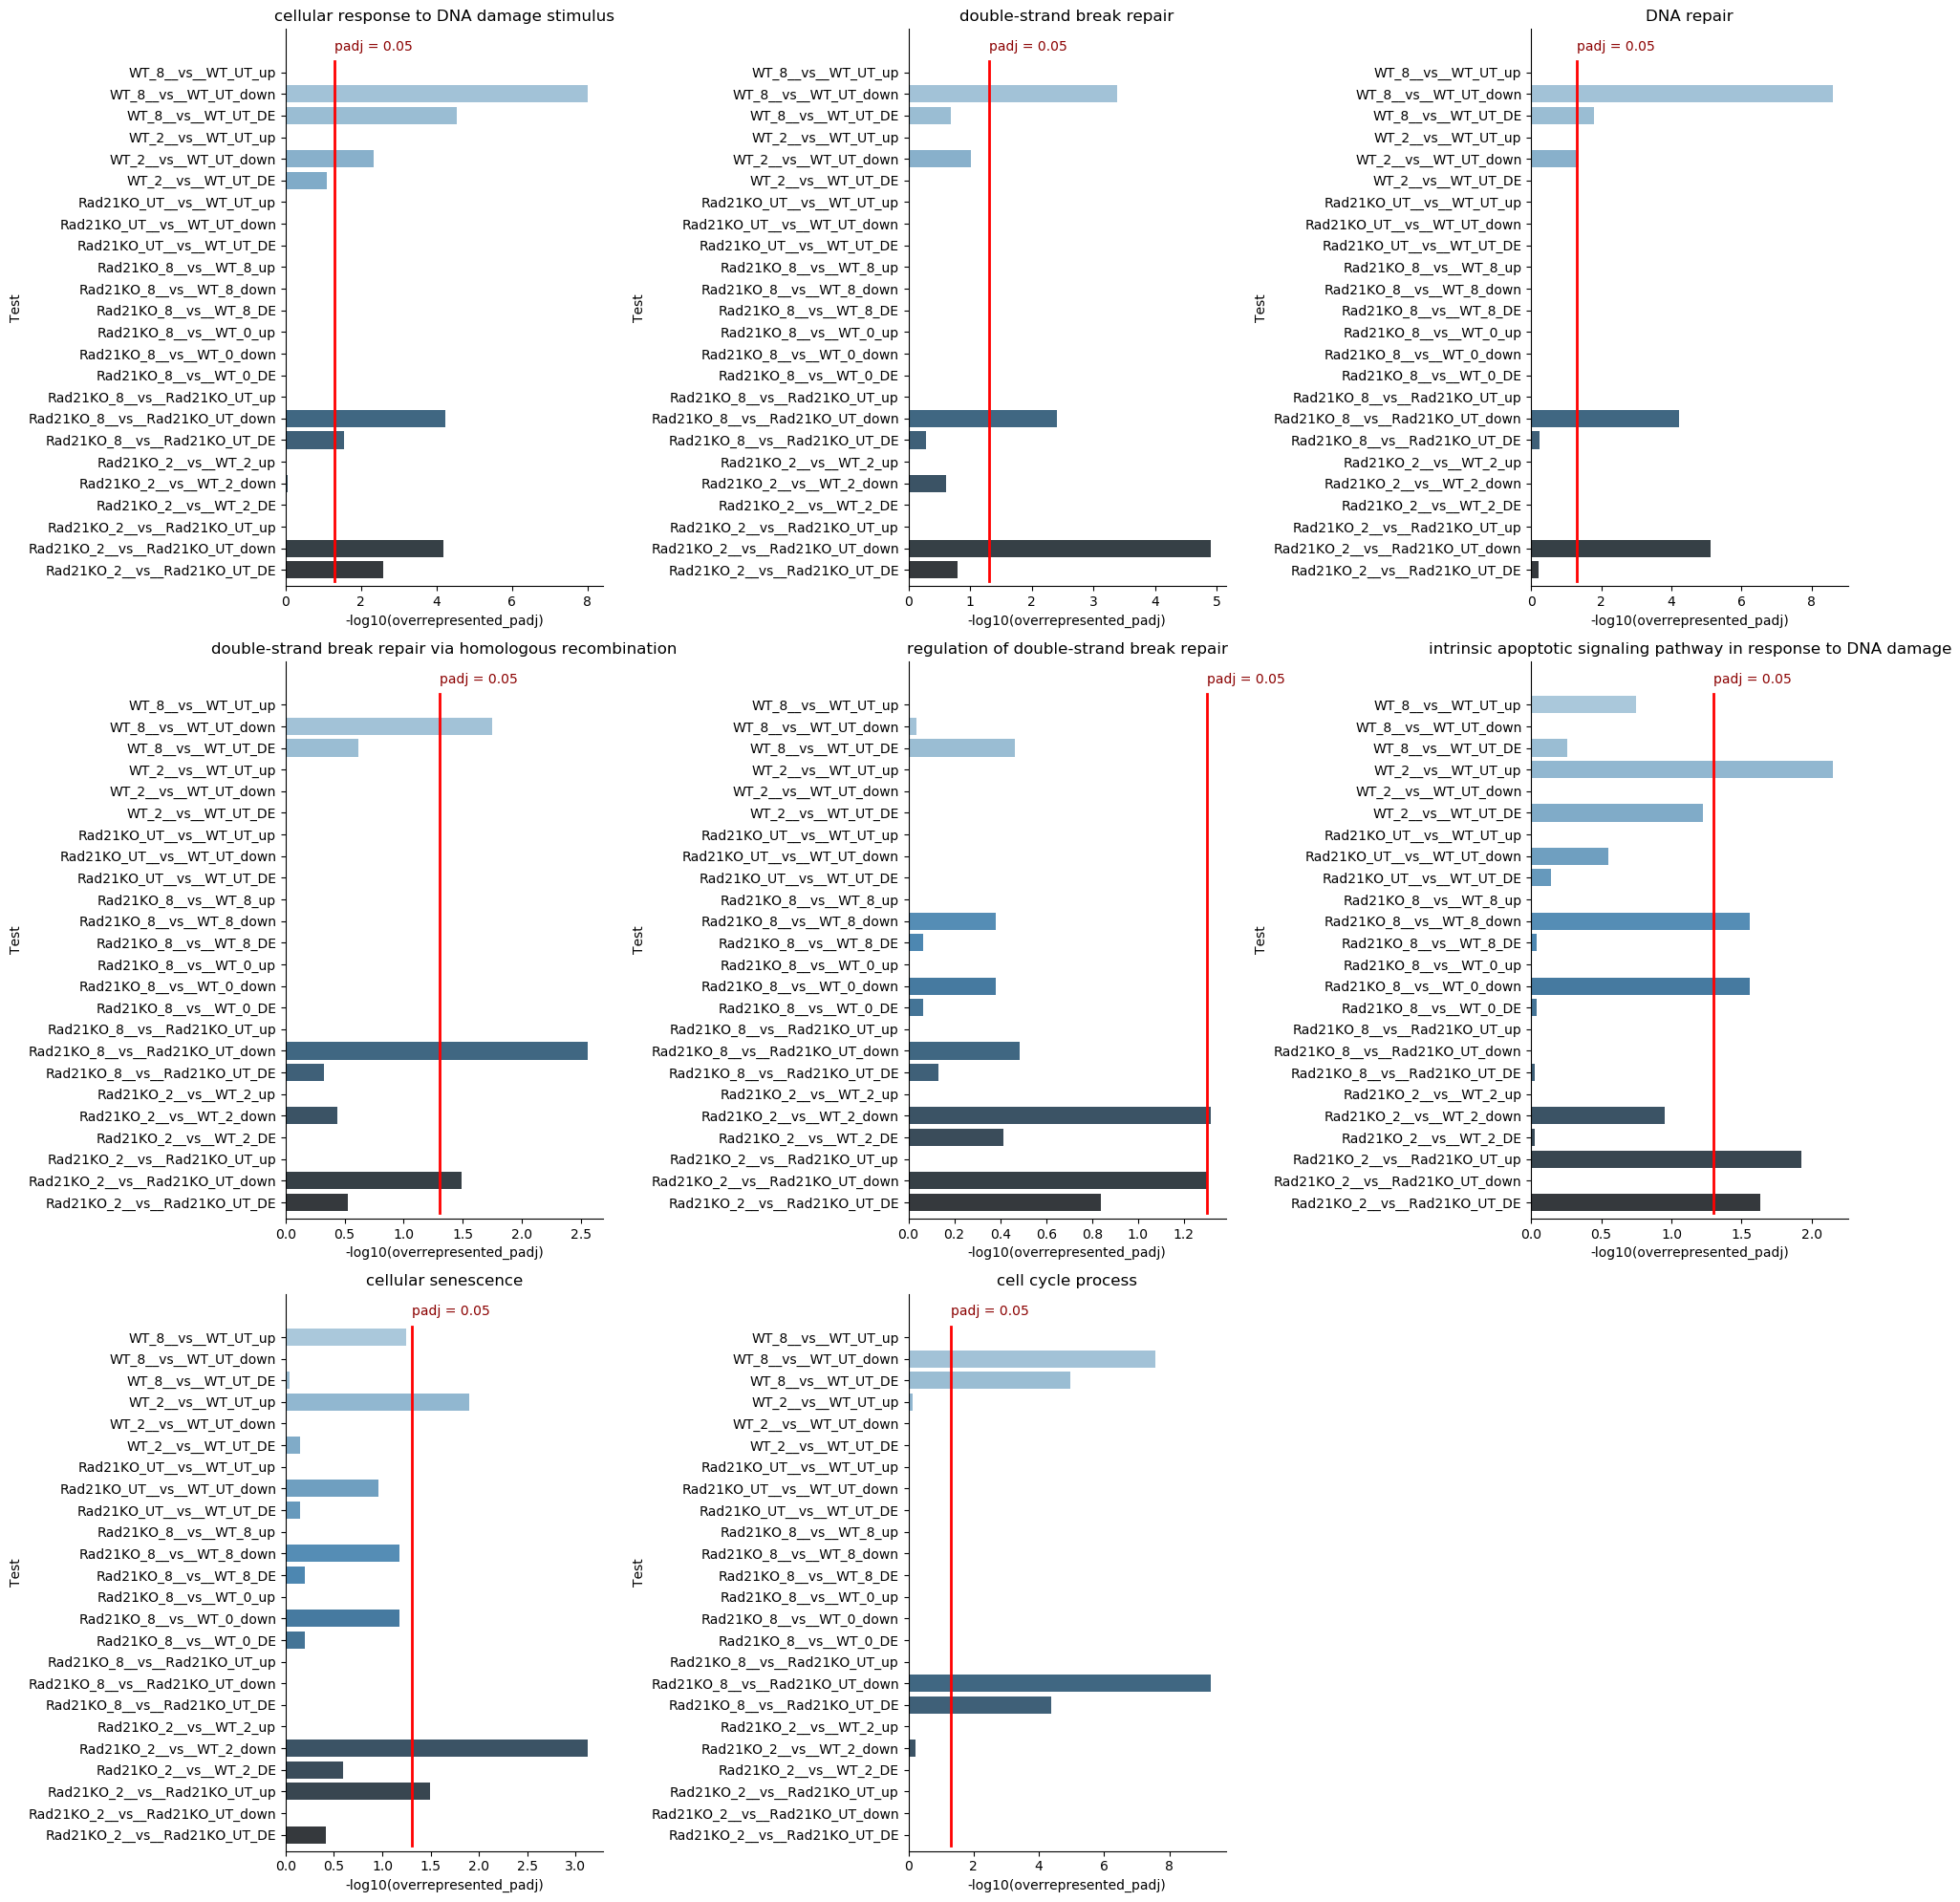

In [4]:
figure(figsize = (20, 20))

subplot(3, 3, 1)
goterm = "GO:0006974"
plot_category(goterm)
subplot(3, 3, 2)
goterm = "GO:0006302"
plot_category(goterm)
subplot(3, 3, 3)
goterm = "GO:0006281"
plot_category(goterm)
subplot(3, 3, 4)
goterm = "GO:0000724"
plot_category(goterm)
subplot(3, 3, 5)
goterm = "GO:2000779"
plot_category(goterm)

subplot(3, 3, 6)
goterm = "GO:0008630"
plot_category(goterm)
subplot(3, 3, 7)
goterm = "GO:0090398"
plot_category(goterm)

subplot(3, 3, 8)
goterm = "GO:0022402"
plot_category(goterm)

plt.tight_layout()

┌ Warning: RCall.jl: Warning in fgsea(pathwaysH, ranks, minSize = 50, maxSize = 10000, nperm = 10000) :
│   You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.
│ Warning in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam,  :
│   There are ties in the preranked stats (0.1% of the list).
│ The order of those tied genes will be arbitrary, which may produce unexpected results.
│ Warning in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam,  :
│   There are duplicate gene names, fgsea may produce unexpected results.
└ @ RCall /Users/irene/.julia/packages/RCall/eRsxl/src/io.jl:160
┌ Warning: RCall.jl: Warning in fgsea(pathwaysH, ranks, minSize = 50, maxSize = 10000, nperm = 10000) :
│   You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea fun

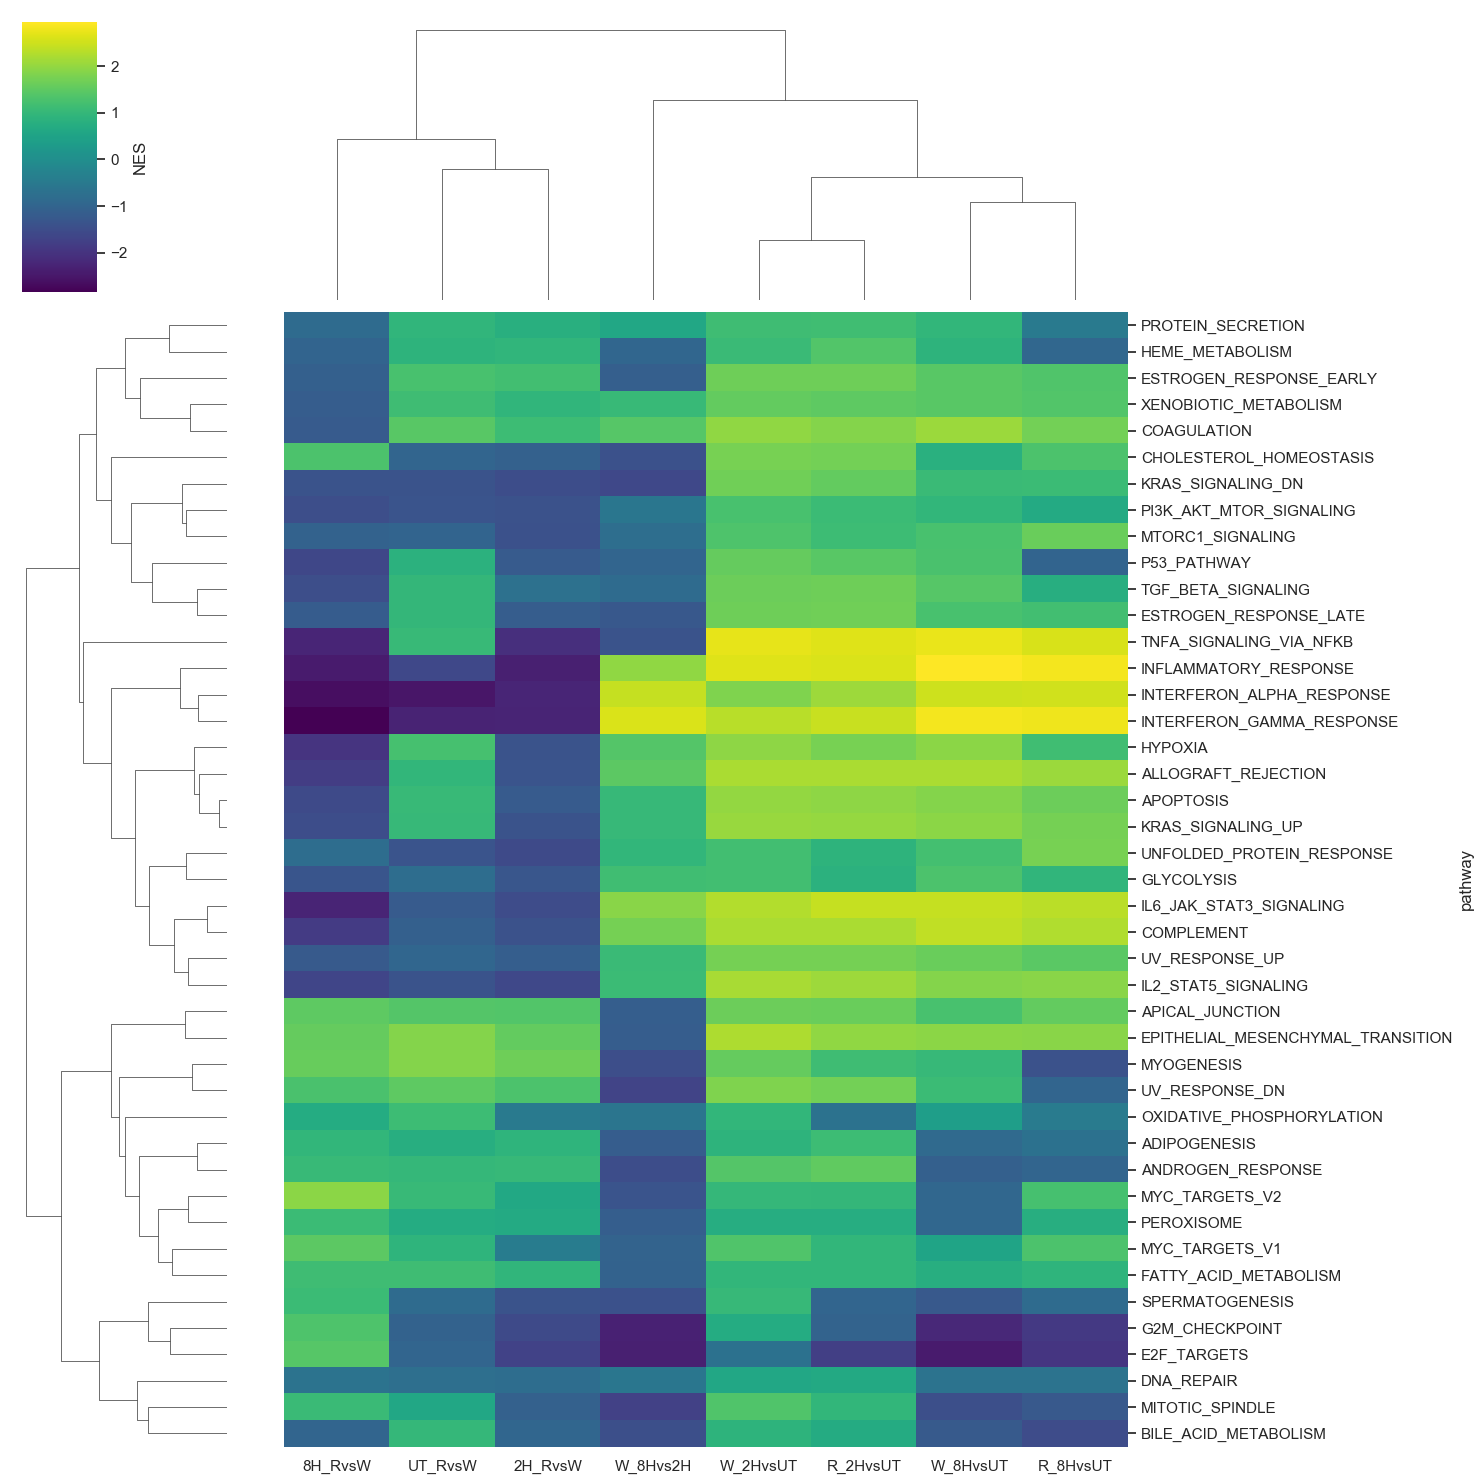

In [29]:

include("4_GSEA.jl")


rad21wtg = do_Hallmarks_GSEA(rad21wt; mouse_ensemblID = :EnsemblID)
rad21wt_2g = do_Hallmarks_GSEA(rad21wt_2; mouse_ensemblID = :EnsemblID)
rad21wt_8g = do_Hallmarks_GSEA(rad21wt_8; mouse_ensemblID = :EnsemblID) 
wt_2g = do_Hallmarks_GSEA(wt_2; mouse_ensemblID = :EnsemblID)
wt_28g = do_Hallmarks_GSEA(wt_28; mouse_ensemblID = :EnsemblID)

wt_8g = do_Hallmarks_GSEA(wt_8; mouse_ensemblID = :EnsemblID)
rad21_2g = do_Hallmarks_GSEA(rad21_2; mouse_ensemblID = :EnsemblID) 
rad21_8g = do_Hallmarks_GSEA(rad21_8; mouse_ensemblID = :EnsemblID) 


tb = joinGSEASforTable(
    rad21wtg, rad21wt_2g, rad21wt_8g,wt_2g,wt_8g,rad21_2g,rad21_8g,wt_28g,
    names = ["UT_RvsW", "2H_RvsW", "8H_RvsW", "W_2HvsUT", "W_8HvsUT", "R_2HvsUT",  "R_8HvsUT","W_8Hvs2H"])

CSV.write("Hallmark_GSEA.csv",tb)


py"""
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("Hallmark_GSEA.csv", index_col = "pathway")
ax = sns.clustermap(df, cmap="viridis", cbar_kws={'label': 'NES'}, figsize =(15, 15))
plt.show()
ax.savefig("Hallmark_GSEA_AllSystems.svg")"""

In [30]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [a93c6f00] DataFrames v0.22.7
  [31c24e10] Distributions v0.23.12
  [c2308a5c] FASTX v1.2.0
  [53c48c17] FixedPointNumbers v0.8.4
  [09f84164] HypothesisTests v0.10.2
  [7073ff75] IJulia v1.23.2
  [6a3955dd] ImageFiltering v0.6.21
  [6218d12a] ImageMagick v1.2.2
  [86fae568] ImageView v0.10.13
  [916415d5] Images v0.23.3
  [4138dd39] JLD v0.12.3
  [093fc24a] LightGraphs v1.3.5
  [10e44e05] MATLAB v0.8.0
  [f8716d33] MultipleTesting v0.4.1
  [eadc2687] Pandas v1.4.0
  [91a5bcdd] Plots v1.21.2
  [92933f4c] ProgressMeter v1.5.0
  [438e738f] PyCall v1.92.2
  [d330b81b] PyPlot v2.9.0
  [6f49c342] RCall v0.13.10
  [3646fa90] ScikitLearn v0.6.3
  [d2ef9438] Seaborn v0.4.1
  [2913bbd2] StatsBase v0.33.10


In [35]:
include("4_GSEA.jl")


tb = joinGSEASforTable(
    rad21wtg, rad21wt_2g, rad21wt_8g,
    names = ["UT_RvsW", "2H_RvsW", "8H_RvsW"])


tb2 = joinGSEASforTable_padj(
    rad21wtg, rad21wt_2g, rad21wt_8g,
    names = ["UT_RvsW", "2H_RvsW", "8H_RvsW"])




interest = [
    "G2M_CHECKPOINT",
    "E2F_TARGETS",
    "DNA_REPAIR",
    "UV_RESPONSE_UP",
    "UV_RESPONSE_DN",
    "INFLAMMATORY_RESPONSE",
    "INTERFERON_ALPHA_RESPONSE",
    "INTERFERON_GAMMA_RESPONSE",
    "IL2_STAT5_SIGNALING"
]

interestind = [findfirst(x -> ii==x, tb[!,:pathway]) for ii in interest] 
tb2

,pathway,UT_RvsW,2H_RvsW,8H_RvsW
,String,Float64,Float64,Float64
1,TNFA_SIGNALING_VIA_NFKB,0.693593,0.00217777,0.000868862
2,HYPOXIA,0.284771,0.0474186,0.000868862
3,CHOLESTEROL_HOMEOSTASIS,0.716028,0.456906,0.126015
4,MITOTIC_SPINDLE,0.999867,0.401204,0.3435
5,TGF_BETA_SIGNALING,0.716028,1.0,0.0569793
6,IL6_JAK_STAT3_SIGNALING,0.470903,0.0370801,0.000868862
7,DNA_REPAIR,0.999867,1.0,0.999614
8,G2M_CHECKPOINT,0.693593,0.00540201,0.0383043
9,APOPTOSIS,0.693593,0.199753,0.006724


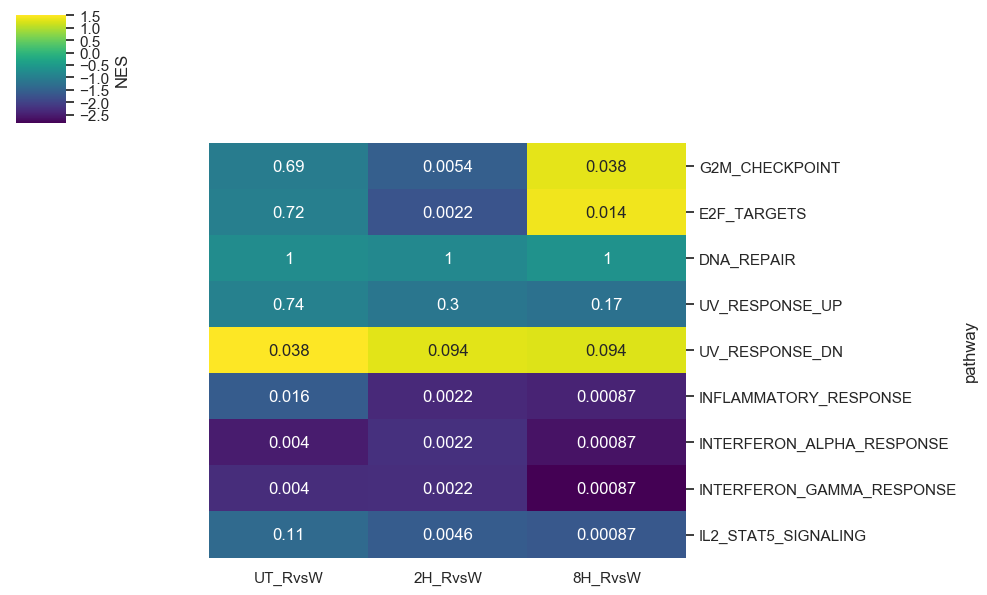

In [48]:
CSV.write("Hallmark_GSEA2.csv",tb[interestind, :])
CSV.write("Hallmark_GSEA2padj.csv",tb2[interestind, :])

py"""
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Hallmark_GSEA2.csv", index_col = "pathway")
df2 = pd.read_csv("Hallmark_GSEA2padj.csv", index_col = "pathway")
ax = sns.clustermap(df, cmap="viridis", col_cluster = 0, row_cluster = 0,cbar_kws={'label': 'NES'}, annot = df2,figsize =(10, 6))
plt.show()
ax.savefig("Hallmark_GSEA_short.svg" )"""